## Make reports with Hantek 4032L USB-based 32-channel logic analyzer and sigrok software.

>Developed by [@edyatl](https://github.com/edyatl) February 2024 <edyatl@yandex.ru>

In [1]:
# Load Jupyter extension for auto correction coding style based on Black Lib
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Install a pip package in the current Jupyter kernel
# import sys

# !{sys.executable} -m pip install -U pip

<IPython.core.display.Javascript object>

## Check two datasets in CSV on storage

In [3]:
# Execute a shell command
!head ../data4.csv && head ../data1.csv

AS3-2,AS3-1,AS4-2,AS4-1
1,0,0,1
1,0,0,1
1,0,0,1
1,0,0,1
1,0,0,1
1,0,0,1
1,0,0,1
1,0,0,1
1,0,0,1
logic1,logic2,logic3,logic4,logic5,logic6
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [4]:
# Standard imports
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import signal

# Nicest style for plots
sns.set(style="ticks")

<IPython.core.display.Javascript object>

## Load data

**Command line to get dataset.**

```bash
sigrok-cli --driver hantek-4032l \
            --channels A0=start,A1=AS3_2,A2=as3_1,A3=AS1_2 \
            --output-file test001.csv \
            --output-format csv \
            --config samplerate=1000 \
            --samples 2048 \
            --triggers start=r \
            --wait-trigger
```

In [5]:
csv_data = os.path.join(os.path.abspath('../'), 'data4.csv')
df = pd.read_csv(csv_data)

<IPython.core.display.Javascript object>

In [6]:
csv_data = os.path.join(os.path.abspath('../'), 'data1.csv')
df2 = pd.read_csv(csv_data)

<IPython.core.display.Javascript object>

In [7]:
# df = df[507:534]
# df[507:534]
df

,AS3-2,AS3-1,AS4-2,AS4-1
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
10235,0,1,0,1
10236,0,1,0,1
10237,0,1,0,1
10238,0,1,0,1


<IPython.core.display.Javascript object>

In [8]:
df2

,logic1,logic2,logic3,logic4,logic5,logic6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
10235,0,0,0,0,0,0
10236,0,0,0,0,0,0
10237,0,0,0,0,0,0
10238,0,0,0,0,0,0


<IPython.core.display.Javascript object>

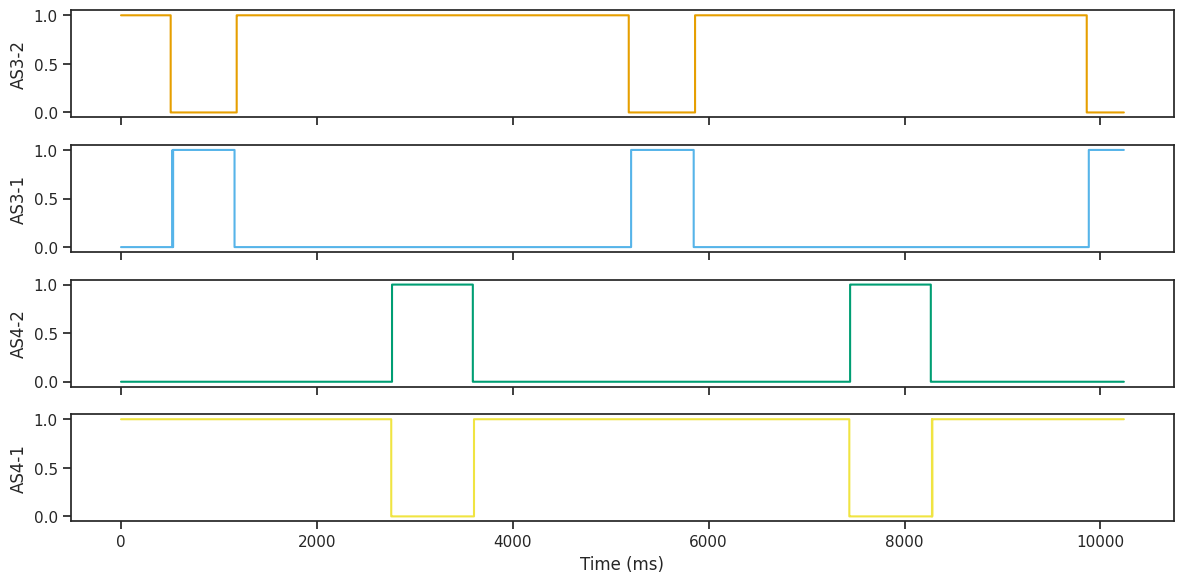

<IPython.core.display.Javascript object>

In [25]:
# Set a list with six main css colors
colors = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

t = df.index
# Set subplots size to 10x6
plt.rcParams["figure.figsize"] = (12, 6)
fig, axes = plt.subplots(4, 1, sharex="col")
for i, col in enumerate(df.columns):
    # print(i, col)
    axes[i].step(t, df[col], colors[i])
    axes[i].set_ylabel(col)

axes[i].set_xlabel("Time (ms)")
plt.tight_layout()  # Adjust subplot layout to prevent overlapping  
plt.show()

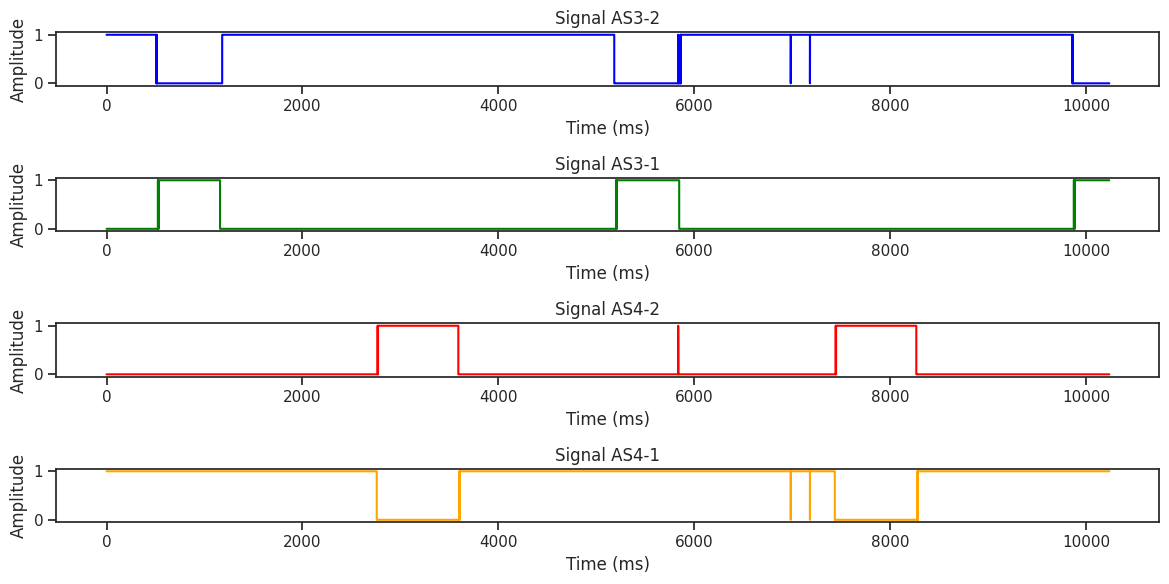

<IPython.core.display.Javascript object>

In [10]:
# Plot each signal
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot Signal AS3-2
plt.subplot(411)
plt.step(t, df['AS3-2'], color='blue')
plt.title('Signal AS3-2')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

# Plot Signal AS3-1
plt.subplot(412)
plt.step(t, df['AS3-1'], color='green')
plt.title('Signal AS3-1')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

# Plot Signal AS4-2
plt.subplot(413)
plt.step(t, df['AS4-2'], color='red')
plt.title('Signal AS4-2')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

# Plot Signal AS4-1
plt.subplot(414)
plt.step(t, df['AS4-1'], color='orange')
plt.title('Signal AS4-1')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()  # Show the plot

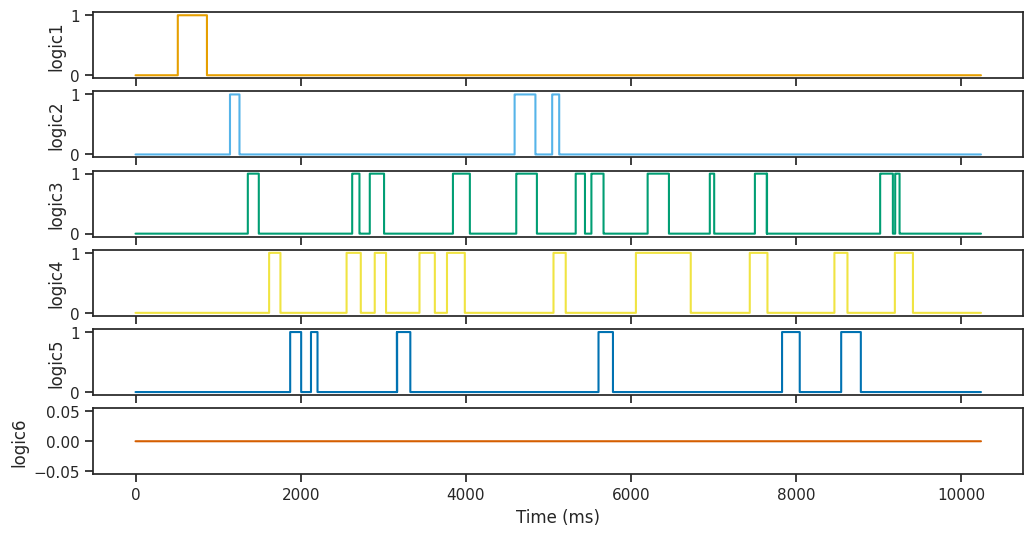

<IPython.core.display.Javascript object>

In [11]:
# Set a list with six main css colors
colors = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

t2 = df2.index
# Set subplots size to 12x6
plt.rcParams["figure.figsize"] = (12, 6)
fig, axes = plt.subplots(6, 1, sharex="col")
for i, col in enumerate(df2.columns):
    # print(i, col)
    axes[i].step(t, df2[col], colors[i])
    # axes[i].set_title(col)
    axes[i].set_xlabel("Time (ms)")
    axes[i].set_ylabel(col)
    
plt.show()

In [12]:
value_counts = df['AS3-2'].value_counts()

<IPython.core.display.Javascript object>

In [13]:
value_counts

AS3-2
1    8511
0    1729
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
# Function to invert values in a consecutive sequence
def invert_consecutive_values(sequence):
    # Count the occurrences of each value in the sequence
    value_counts = sequence.value_counts()
    # Identify values occurring less than 100 times
    invert_values = value_counts[value_counts < 100].index
    # Invert the values for the identified values
    sequence = sequence.loc[sequence.isin(invert_values)] = 1 - sequence
    return sequence

<IPython.core.display.Javascript object>

In [15]:
# Group consecutive values and apply the normalization function
grouped = df.groupby((df['AS3-2'] != df['AS3-2'].shift()).cumsum())
grouped

<IPython.core.display.Javascript object>

## Filtering noise in signals series

In [16]:
def noise_filter(ser: pd.Series) -> np.array:
    return signal.medfilt(ser, 5)

<IPython.core.display.Javascript object>

In [17]:
# df['AS3-2'] = noise_filter(df['AS3-2'])
# df['AS4-1'] = noise_filter(df['AS4-1'])
for col in df.columns:
    df[col] = noise_filter(df[col])

<IPython.core.display.Javascript object>

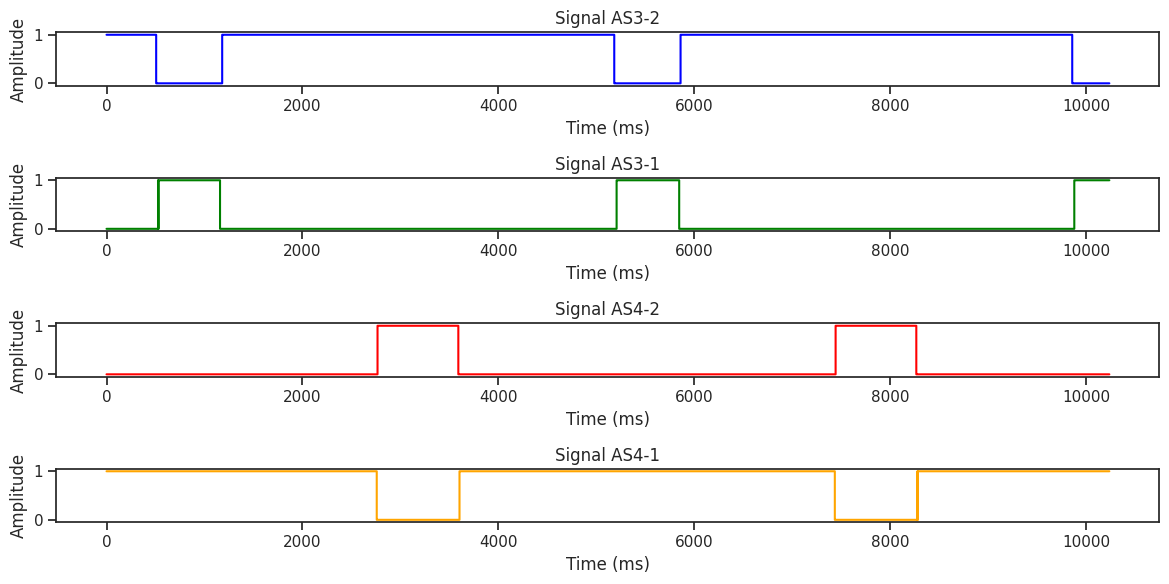

<IPython.core.display.Javascript object>

In [18]:
# Plot each signal
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot Signal AS3-2
plt.subplot(411)
plt.step(t, df['AS3-2'], color='blue')
plt.title('Signal AS3-2')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

# Plot Signal AS3-1
plt.subplot(412)
plt.step(t, df['AS3-1'], color='green')
plt.title('Signal AS3-1')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

# Plot Signal AS4-2
plt.subplot(413)
plt.step(t, df['AS4-2'], color='red')
plt.title('Signal AS4-2')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

# Plot Signal AS4-1
plt.subplot(414)
plt.step(t, df['AS4-1'], color='orange')
plt.title('Signal AS4-1')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()  # Show the plot

## Mesuring of signal pulse width

In [19]:
# The function measures the signal pulse width
def signal_pulse_width(ser: pd.Series) -> np.array:
    return np.diff(ser)

<IPython.core.display.Javascript object>

In [20]:
sig_width = signal_pulse_width(df['AS4-2'])
# np.indices(sig_width.shape)

<IPython.core.display.Javascript object>

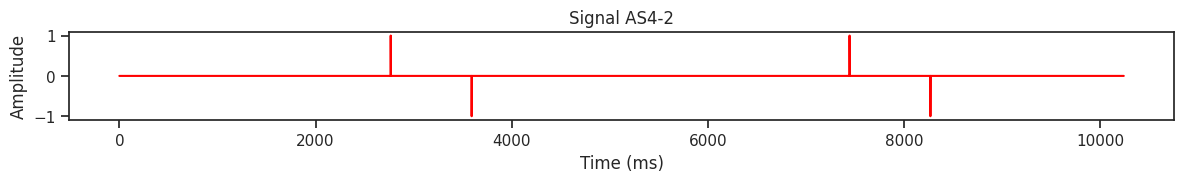

<IPython.core.display.Javascript object>

In [21]:
# Plot diff signal
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot Signal AS4-2
plt.subplot(413)
plt.step(np.indices(sig_width.shape).ravel(), sig_width, color='red')
plt.title('Signal AS4-2')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()  # Show the plot

In [22]:
# The function measures the signal first pulse width and returns tuple (1st pulse x1 point, 1st pulse x2 point, pulse time interval)
def signal_first_pulse_width(ser: pd.Series) -> tuple:
    return (np.where(ser == 1)[0][0], np.where(ser == -1)[0][0], np.where(ser == -1)[0][0] - np.where(ser == 1)[0][0])

<IPython.core.display.Javascript object>

In [23]:
sig_tpl = signal_first_pulse_width(sig_width)
sig_tpl

(2767, 3592, 825)

<IPython.core.display.Javascript object>

## Checking for USB flash storage and file name

## Saving PDF file with plots to USB flash drive